In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('off')
    plt.show()

## 1. Colour Histograms

### 1.1 Histogram Calculations and Plotting

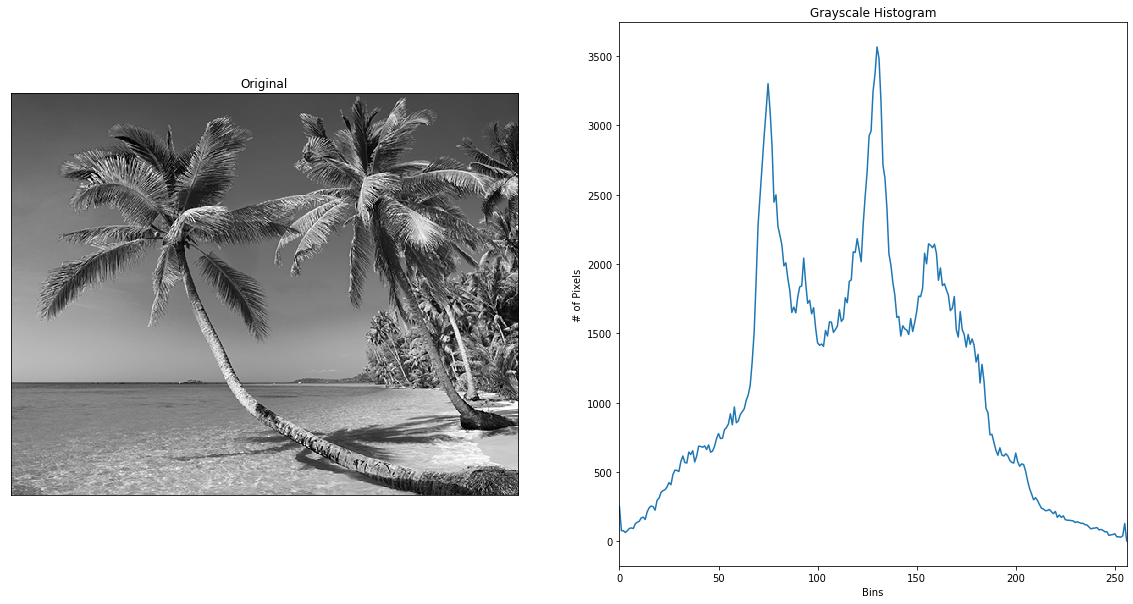

In [3]:
image = cv2.imread('../img/beach.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# construct a grayscale histogram
hist = cv2.calcHist([gray], [0], None, [260], [0, 260])
 
# matplotlib expects RGB images so convert and then display the image
# with matplotlib to avoid GUI conflicts/errors (mainly on macOS)
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
plt.title('Original'), plt.xticks([]), plt.yticks([])
 
# plot the histogram
plt.subplot(122)
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

plt.show()

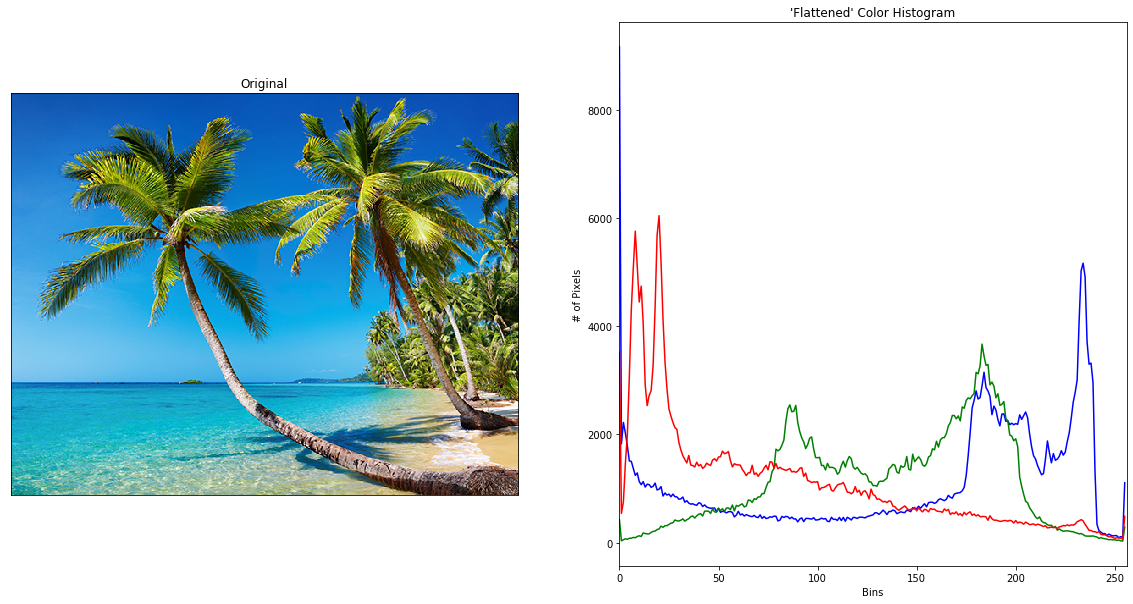

In [4]:
image = cv2.imread('../img/beach.png')

# grab the image channels, initialize the tuple of colors and the
# figure
chans = cv2.split(image)
colors = ("b", "g", "r")

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(np.flip(image, axis = 2))
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and plot it
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.show()

### 1.2 Histogram Calculations and Plotting on Image Masks

In [5]:
def plot_histogram(image, title, mask=None):
    # grab the image channels, initialize the tuple of colors and
    # the figure
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
 
    # loop over the image channels
    for (chan, color) in zip(chans, colors):
        # create a histogram for the current channel and plot it
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

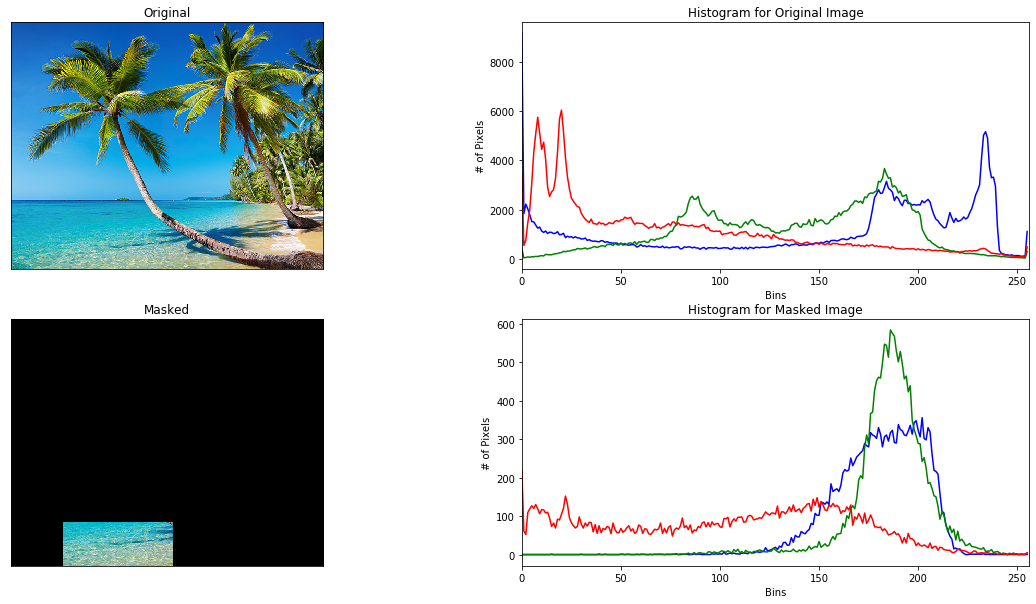

In [6]:
image = cv2.imread('../img/beach.png')

plt.figure(figsize=(20,10))


plt.subplot(221)
plt.imshow(np.flip(image, axis = 2))
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(222)
plot_histogram(image, "Histogram for Original Image")

mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (100, 490), (310, 390), 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

plt.subplot(223)
plt.imshow(np.flip(masked, axis = 2))
plt.title('Masked'), plt.xticks([]), plt.yticks([])

plt.subplot(224)
# compute a histogram for our image, but we'll only include pixels in
# the masked region
plot_histogram(image, "Histogram for Masked Image", mask=mask)


plt.show()

### EXERCISE: Plot histograms for an image of a car and its mask

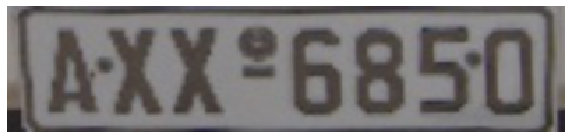

In [7]:
image = np.flip(cv2.imread('../img/license_plate.png'), axis=2)
show_image(image)

<function matplotlib.pyplot.show(*args, **kw)>

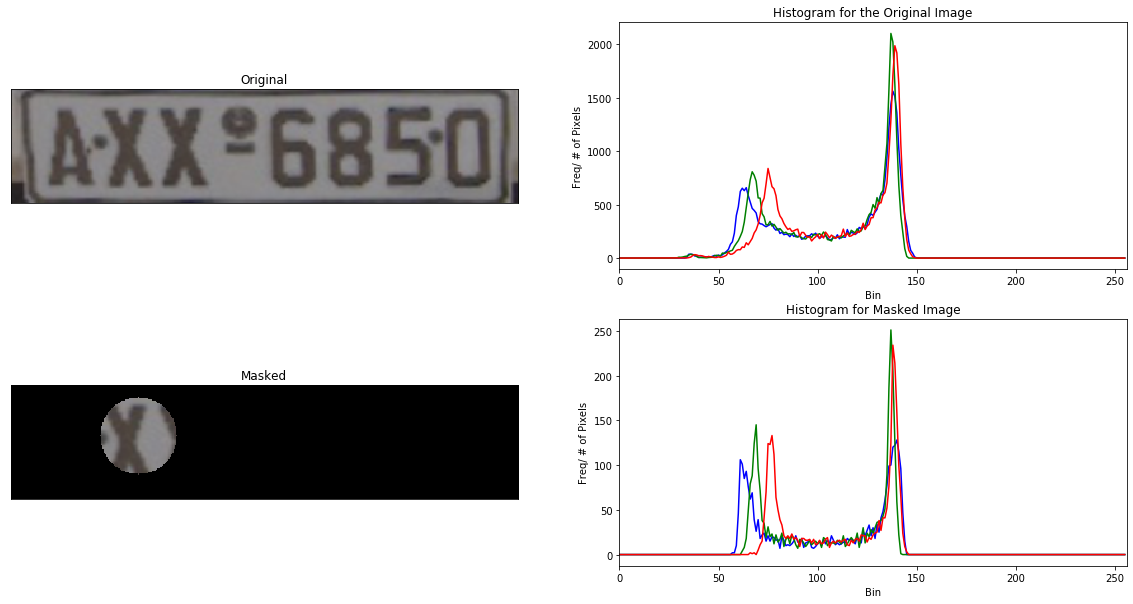

In [8]:
# TODO: Plot a histogram for an image

def plot_histogram(image, title, mask=None):
    # grab the image channels, initialize the tuple of colors and the figure
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.title(title)
    plt.xlabel("Bin")
    plt.ylabel("Freq/ # of Pixels")
    plt.xlim([0, 256])
     
    # loop over the image channels
    for (chan, color) in zip(chans, colors):
        # create a histogram for the each current channel and plot it
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color=color)
        

img = cv2.imread('../img/license_plate.png')

plt.figure(figsize=(20,10))
#image = cv2.imread('../img/beach.png')

plt.subplot(221)
plt.imshow(np.flip(img, axis=2))
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(222)
plot_histogram(img, "Histogram for the Original Image")

mask = np.zeros(img.shape[:2], dtype="uint8")
cv2.circle(mask, (100,40), 30, 255, -1)
maskimg = cv2.bitwise_and(img, img, mask=mask)

plt.subplot(223)
plt.imshow(np.flip(maskimg, axis = 2))
plt.title('Masked'), plt.xticks([]), plt.yticks([])

plt.subplot(224)
# compute a histogram for pixels in the masked region
plot_histogram(img, "Histogram for Masked Image", mask=mask)

plt.show

### 1.3 Histogram Equalisation

In [9]:
def show_hist_cdf(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')

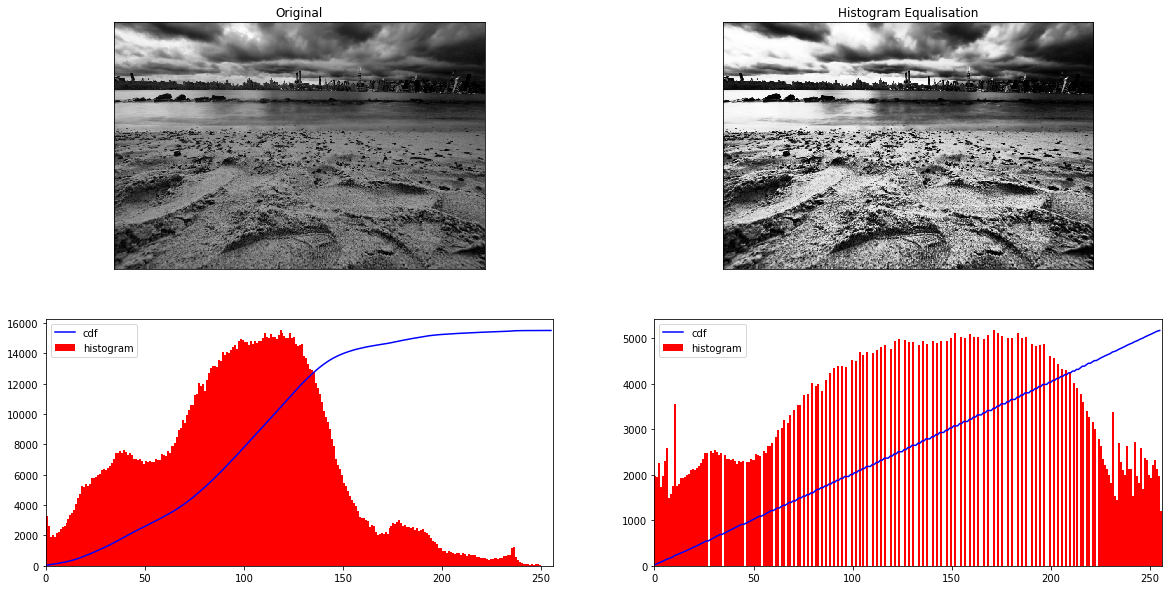

In [10]:
# load the image and convert it to grayscale
image = cv2.imread('../img/landscape.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# apply histogram equalization to stretch the contrast of our image
eq = cv2.equalizeHist(gray)
 
# show our images -- notice how the contrast of the second image has
# been stretched
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.imshow(gray, cmap ='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.imshow(eq, cmap ='gray')
plt.title('Histogram Equalisation'), plt.xticks([]), plt.yticks([])

plt.subplot(223)
show_hist_cdf(image)

plt.subplot(224)
show_hist_cdf(eq)

plt.show()

### PROJECT: Perform Canny Edge Detection on two versions of an image. The original and the enhanced equalised version. What's the difference in results?

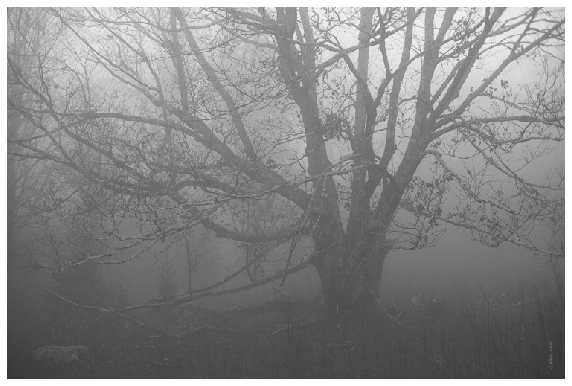

In [11]:
image = cv2.imread('../img/tree.jpg')
show_image(image)

120.0 80 159
129.0 86 171


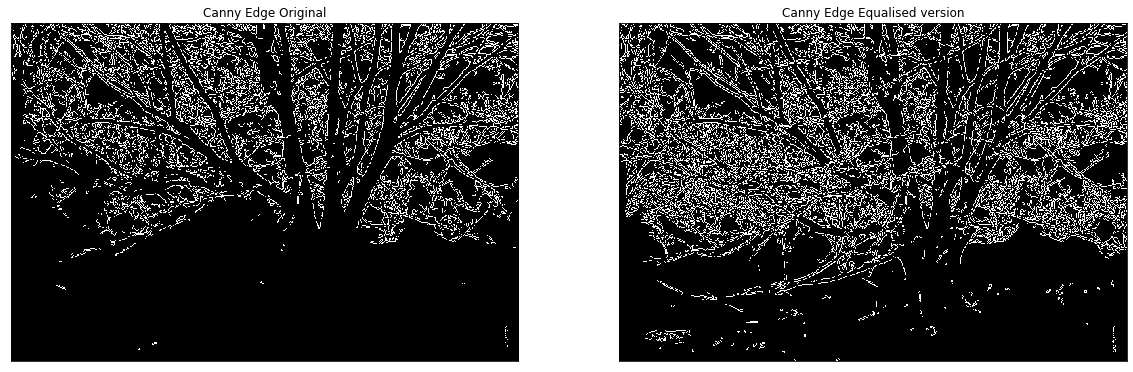

In [12]:
# TODO: Your Code Below

def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
 
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    
    print(v, lower, upper)
    # return the edged image
    return edged


# load the image and convert it to grayscale
img = cv2.imread('../img/tree.jpg') 
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ori_img_canny = auto_canny(grayimg)

# apply histogram equalization to stretch the contrast of our image
eq = cv2.equalizeHist(grayimg)
eq_img_canny = auto_canny(eq)


# display images
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(ori_img_canny, cmap ='gray')
plt.title('Canny Edge Original'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(eq_img_canny, cmap ='gray')
plt.title('Canny Edge Equalised version'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
#Solutions
%load ../solutions/canny_equalised.py
